In [1]:
#pre-processing

import sys
sys.path.append('C:\\users\\rpoje\\appdata\\local\\packages\\pythonsoftwarefoundation.python.3.10_qbz5n2kfra8p0\\localcache\\local-packages\\python310\\site-packages')

import cv2
import os

# Input and output directories
input_dir = "C:\\Users\\rpoje\\MiLk\\Anomaly detection\\Anamoly Detection\\"
output_dir = "./final-db"  # Replace with your output directory

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Function to crop and resize an image
def process_image(image_path, output_path, width, height):
    try:
        # Load the image
        img = cv2.imread(image_path)

        # Check if the image loaded successfully
        if img is not None:
            # Crop and resize the image
            cropped_img = cv2.resize(img, (width, height))

            # Create intermediate directories if they don't exist
            os.makedirs(os.path.dirname(output_path), exist_ok=True)

            # Save the processed image to the output directory
            cv2.imwrite(output_path, cropped_img)
        else:
            raise Exception("Error loading the image")

    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        # Delete the problematic image
        os.remove(image_path)

# Function to process images in subdirectories
def process_subdirectory(input_subdir, output_subdir, width, height):
    for root, _, files in os.walk(input_subdir):
        for filename in files:
            input_path = os.path.join(root, filename)
            rel_path = os.path.relpath(input_path, input_subdir)
            output_path = os.path.join(output_subdir, rel_path)
            process_image(input_path, output_path, width, height)
        print("done-1")

# Process images in the "train" and "val" directories
train_input_dir = os.path.join(input_dir, "train")
train_output_dir = os.path.join(output_dir, "train")
val_input_dir = os.path.join(input_dir, "val")
val_output_dir = os.path.join(output_dir, "val")

# Process training data
process_subdirectory(train_input_dir, train_output_dir, 128, 128)

# Process validation data
process_subdirectory(val_input_dir, val_output_dir, 128, 128)

print("Image processing and error handling completed.")


done-1
done-1
done-1
done-1
done-1
done-1
done-1
done-1
done-1
done-1
Image processing and error handling completed.


In [4]:
#train

from ultralytics import YOLO

model = YOLO('yolov8n-cls.pt')
model.train(data='C:\\Users\\rpoje\\MiLk\\Anomaly detection\\anamoly-detection-main\\final-db\\',
            epochs=100, imgsz=64)


Ultralytics YOLOv8.1.34 🚀 Python-3.10.11 torch-2.2.1+cpu CPU (12th Gen Intel Core(TM) i5-1235U)
engine\trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=C:\Users\rpoje\MiLk\Anomaly detection\anamoly-detection-main\final-db\, epochs=100, time=None, patience=100, batch=16, imgsz=64, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train57, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=Fa

: 

In [ ]:
#cam predict1

from ultralytics import YOLO
import numpy as np
import cv2

# Load the YOLO model
model = YOLO("./runs/classify/train43/weights/best.pt")

# Open the webcam
cap = cv2.VideoCapture(1)

while True:
    # Read a frame from the webcam
    ret, frame = cap.read()

    # Predict on the frame using YOLO
    results = model(frame)

    # Extract prediction information
    names_dict = results[0].names

    probs = results[0].probs.data.tolist()

    print(names_dict)
    print(probs)

    output = names_dict[np.argmax(probs)]

    if output == "no-fire" or output == "no-fight":
        output = "normal"

    # Display the label as text at the bottom center of the frame
    text_size = cv2.getTextSize(output, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 2)[0]
    text_x = (frame.shape[1] - text_size[0]) // 2
    text_y = frame.shape[0] - 10

    cv2.putText(
        frame, output, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2
    )

    # Display the frame with class labels
    cv2.imshow("YOLO Predictions", frame)

    # Break the loop if the 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

# Release the webcam and close the OpenCV window
cap.release()
cv2.destroyAllWindows()


In [ ]:
#test predict2

from ultralytics import YOLO
import numpy as np
import cv2

# Load the YOLO model
model = YOLO("./runs/classify/train43/weights/last.pt")

results = [model('./test/fire.jpg'), model('./test/gun.jpg'), model('./test/knife.jpg'), model('./test/normal.jpg')]  # predict on an image

print("\nTest images found to be : \n")
for i in results:
    names_dict = i[0].names

    probs = i[0].probs.data.tolist()

    output = names_dict[np.argmax(probs)]

    if(output == "no-fire" or output == "no-fight"):
        output = "normal"

    print(output)


image 1/1 c:\Users\rpoje\ML PROJ\Anomaly detection\anamoly-detection-main\test\fire.jpg: 64x64 fire 1.00, normal 0.00, weapon 0.00, knife 0.00, 9.1ms
Speed: 1.0ms preprocess, 9.1ms inference, 0.0ms postprocess per image at shape (1, 3, 64, 64)

image 1/1 c:\Users\rpoje\ML PROJ\Anomaly detection\anamoly-detection-main\test\gun.jpg: 64x64 weapon 0.94, normal 0.06, knife 0.00, fire 0.00, 14.4ms
Speed: 1.0ms preprocess, 14.4ms inference, 0.0ms postprocess per image at shape (1, 3, 64, 64)

image 1/1 c:\Users\rpoje\ML PROJ\Anomaly detection\anamoly-detection-main\test\knife.jpg: 64x64 knife 1.00, weapon 0.00, fire 0.00, normal 0.00, 14.9ms
Speed: 0.0ms preprocess, 14.9ms inference, 0.0ms postprocess per image at shape (1, 3, 64, 64)

image 1/1 c:\Users\rpoje\ML PROJ\Anomaly detection\anamoly-detection-main\test\normal.jpg: 64x64 normal 1.00, knife 0.00, fire 0.00, weapon 0.00, 10.1ms
Speed: 1.0ms preprocess, 10.1ms inference, 0.0ms postprocess per image at shape (1, 3, 64, 64)



Test images found to be : 

fire
weapon
knife
normal


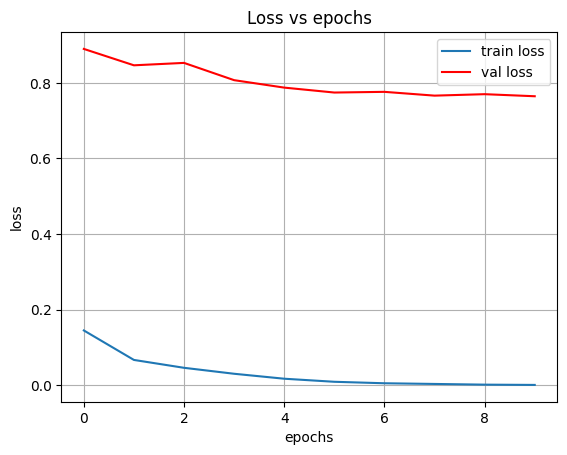

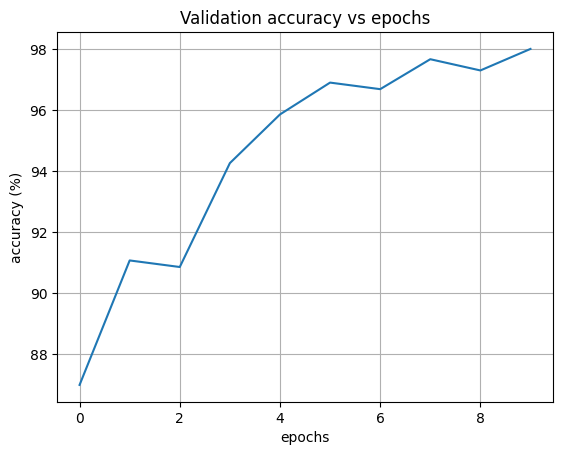

In [ ]:
#plotmetrics

import os
import pandas as pd
import matplotlib.pyplot as plt


results_path = './runs/classify/train43/results.csv'

results = pd.read_csv(results_path)

plt.figure()
plt.plot(results['                  epoch'], results['             train/loss'], label='train loss')
plt.plot(results['                  epoch'], results['               val/loss'], label='val loss', c='red')
plt.grid()
plt.title('Loss vs epochs')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()


plt.figure()
plt.plot(results['                  epoch'], results['  metrics/accuracy_top1'] * 100)
plt.grid()
plt.title('Validation accuracy vs epochs')
plt.ylabel('accuracy (%)')
plt.xlabel('epochs')

plt.show()